-----
-----
# <b>TP : AI for Image Quality Assessment</b>

Matteo Marengo | matteo.marengo@ens-paris-saclay.fr | matteo.marengo@free.fr

The objective of this TP is to give you some practical insights about what is the construction of a dataset and the problematic and modeling of annotations.

You will not train a model in this TP, but you will see some practical aspects that ML engineer have to face when they are asked to design model: get clean and good data.

**[Submit your solution here!](https://docs.google.com/forms/d/e/1FAIpQLSf1RKdUeP3fFogaQ2TqDfSO8fQnxG8dFI-wh7c-ywuLj7BYkA/viewform)**

----
----



# <b>Part 1 - Designing annotation campaigns to build IQA datasets</b>

### <b>Q1: Cite five difficulties encountred when developping an IQA dataset</b>

#### <b>A1:</b>
For perceptual analysis:<br>
- <b>Neutrality</b>, everyone should do the analysis on the same picture to have neutral results
- <b>Relevancy</b>, the aspects analyzed must focus themselves on relevant aspects for consumers and photographers
- <b>Reliability</b>, the shooting conditions for example are aspects that have to be considered when doing an IQA dataset. For example, weather, light or time of the day introduce variability and it makes difficult to ensure that the results are neutral and reliable.
- <b>Repeatability</b>

These aspect therefore require an IQA protocol (an analysis protocol and a shooting protocol) in order to overcome these limitations, more precisely to obtain more robust and meaningful results.

For objective analysis:<br>
- Normalization and creation of a common quality scale can be a difficult task. The scale has to be grouped based on factors such as lighting conditions for example.

Other difficulites that can also be considered when developping an IQA dataset are the setup of the laboratory that is limited (e.g not enough mannequing in the test) or the difficulty to handle ethnic and gender bias.






### <b>Q2: Cite four methods of annotating image quality</b>

#### <b>A2:</b>
1 - <b>Mean Opinion Score;</b> a group of evaluators will rate the quality of an image on a linear scale (0 to 100 in our examples). The final score will then be determined by averaging the grades.<br>
2 - <b>Ruler method;</b> for this method the use of a predefined scale to measure the quality of an image is used, we have 'image quality anchors'. <br>
3 - <b>Pariwise comparison;</b> the annotator select the best image of a pair of image based on a given criteria.<br>
4 - <b>Pairwise comparison for JOD (Just Objectionable Difference);</b> the image is compared to a reference image.<br>



### <b>Q3: For the two most common methods, which one do you think is a better choice? Cite a situation for each method where it is preferable. Answer these questions by citing two pros and two cons of each method and argument your choice of situations.</b>


#### <b>A3:</b>
The two most common methods are MOS and Pairwise comparisons:
- Pros for MOS are:
  - As there is not a focus on a defined attribute, not a given criteria, the assesment can be broader.
  - It is easy to implement and nearly everyone can do it, so it might be fast to have data
  
- Cons for MOS are:
  - It is still personal judgment, so depending on the person the assesment can be very different.
  - There can be wide inter annotator disagreement so as it is explained, annotators have to be trained with the scale that was defined.
  
- Pros for Pairwise:
  - It is very easy as we only have to choose between two images
  - It can reduce the bias that was induced in the MOS as two image comparison is not too complicated

- Cons for Pairwise:
  - As there are a lot of images, it can take a lot of time to do.
  - There are no scale such as in the ruler method, so the analysis might not be very robust.









### <b>Q4: Let's now focus on Pairwise comparison methods (PWC) and Mean Opinion Score (MOS). Let's imagine that comparing the quality between two images can take on average 5 seconds (PWC), while evaluating the quality of a single image can take around 15 seconds (MOS). Calculate the necessary time to do a full pass of annotations for one person for both methods in Q3. What's the total number of data points (comparisons for PWC and evaluations for MOS) for both methods?</b>


#### <b>A4:</b>
The total number of data points for MOS evaluation is N (number of images). Indeed, the user will look at all the images and grading them with the scale. Therefore the necessary time to do a full pass of annotations is:
- tMOS = 15 * N

The total number of data points for PWC evaluation is N(N-1)/2. Indeed, each image can be compared to N-1 other images and we divide by two to avoid double counting pairs, more precisely $ C(n, k) = \binom{n}{k} = \frac{n!}{k! \times (n - k)!} $, here as $k=2$,
$\binom{N}{2} = \frac{N!}{2! \times (N - 2)!} $, expanding $N!$ as $N \times (N - 1) \times (N - 2)!$, the formula simplifies to $ \binom{N}{2} = \frac{N \times (N - 1)}{2} $. Therefore the necessary time to do a full pass of annotations is:
- tPWC: 5 * N(N-1)/2

### <b>Q5: Given an annotation campaign with N images. How does the time spent on the full annotation campaign change for each method? Plot the evolution of the total annotation cost per person (in minutes) in terms of N (1 to 50) for both methods. What is the minimum number of images on which comparisons (PWC) is more costly?


#### <b> A5: </b>
The full annotation campaign evolution is plotted in the graph below.<br>
The minimum number of images on which comparisons is more costly is at the intersection of the two curves; N=8.

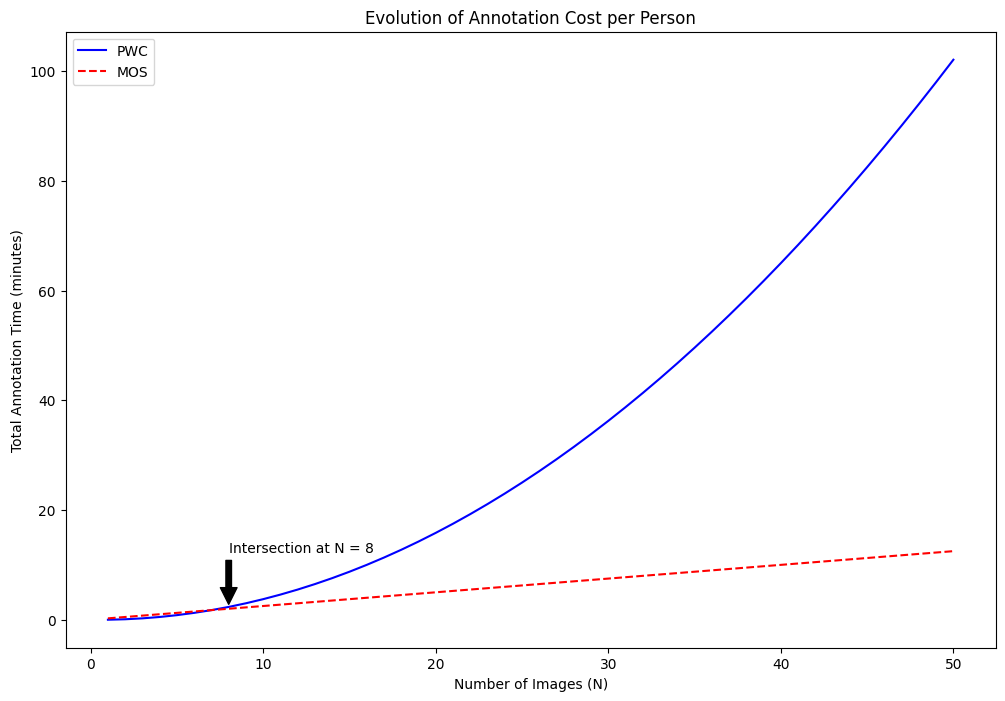

In [55]:
import matplotlib.pyplot as plt

N_values = range(1, 51)

tpwc = [((N_i * (N_i - 1) / 2) ) * 5 / 60 for N_i in N_values]
tmos = [N_i * 15 / 60 for N_i in N_values]

plt.figure(figsize=(12, 8))
plt.plot(N_values, tpwc, 'b-', label='PWC')
plt.plot(N_values, tmos, 'r--', label='MOS')

plt.title('Evolution of Annotation Cost per Person')
plt.xlabel('Number of Images (N)')
plt.ylabel('Total Annotation Time (minutes)')
plt.legend()

for i, (pwc, mos) in enumerate(zip(tpwc, tmos)):
    if pwc > mos:
        intersection_point = (N_values[i], pwc)
        plt.annotate(f'Intersection at N = {N_values[i]}', xy=intersection_point, xytext=(intersection_point[0], intersection_point[1]+10),
                     arrowprops=dict(facecolor='black', shrink=0.05))
        break

# Displaying the plot
plt.show()

### <b>Q6: Redo the plot of Q5 taking into consideration that we need five times more single annotations to reach a similar precision with the comparisons</b>

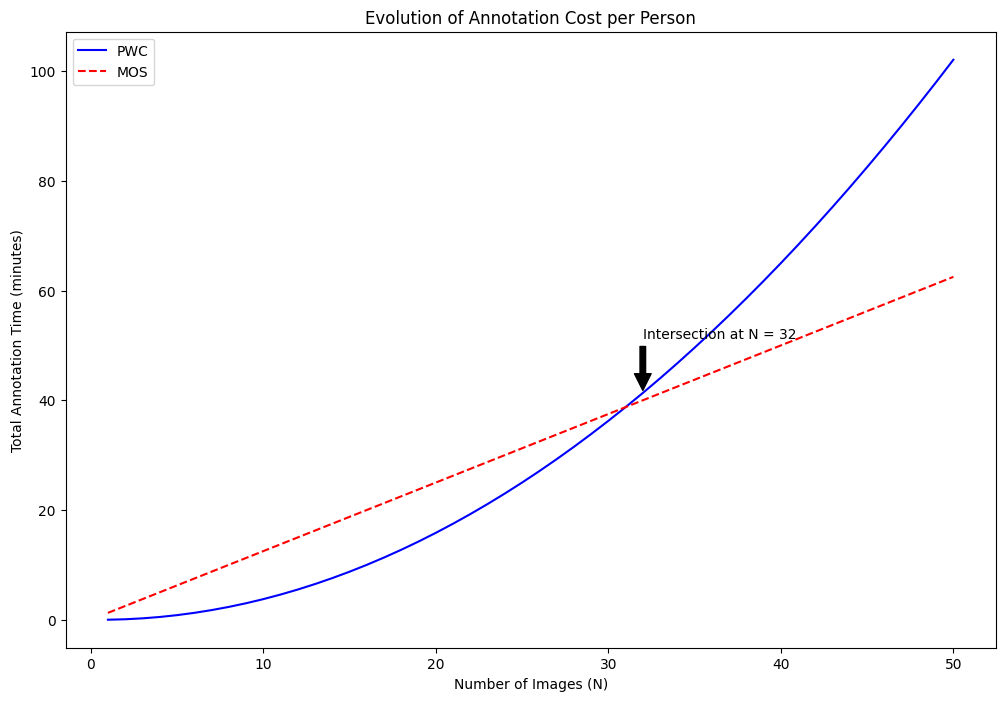

In [56]:
N_values = range(1, 51)

tpwc = [((N_i * (N_i - 1) / 2) * 5) / 60 for N_i in N_values]
tmos = [(N_i * 75) / 60 for N_i in N_values]

plt.figure(figsize=(12, 8))
plt.plot(N_values, tpwc, 'b-', label='PWC')
plt.plot(N_values, tmos, 'r--', label='MOS')

plt.title('Evolution of Annotation Cost per Person')
plt.xlabel('Number of Images (N)')
plt.ylabel('Total Annotation Time (minutes)')
plt.legend()

# Finding and annotating the intersection point
for i, (pwc, mos) in enumerate(zip(tpwc, tmos)):
    if pwc > mos:
        intersection_point = (N_values[i], pwc)
        plt.annotate(f'Intersection at N = {N_values[i]}', xy=intersection_point, xytext=(intersection_point[0], intersection_point[1]+10),
                     arrowprops=dict(facecolor='black', shrink=0.05))
        break

# Displaying the plot
plt.show()

### <b>Q7: For big data sets, it is not feasible to do a complete design for all annotators and all images. How can we reduce the number of comparisons without losing much precision?</b>

#### <b>A7:</b>


When the data is large, it is not possible to achieve a complete design (a full passage on all data points for each observer), hence a sampling strategy is necessary. To make big annotation campaigns more efficient, we can resort to active sampling techniques. <br>
Active sampling [1,2,3,4,5] is the process of optimally choosing the image pairs for PWC annotation tasks. Some of these techniques are more sophisticated than others.
###### [1] Chen, Bennett, Collins-Thompson, Horvitz (2013). Pairwise ranking aggregation in a crowdsourced setting. In Proceedings of the sixth ACM international conference on Web search and data mining, pp. 193–202
###### [2] Ye, Doermann (2014). Active sampling for subjective image quality assessment. In Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 4249–4256.
###### [3] Li, Mantiuk, Wang, Ling, Callet (2018). Hybrid-MST: A hybrid active sampling strategy for pairwise preference aggregation. arXiv preprint arXiv:1810.08851, pp.
###### [4] Xu, Xiong, Chen, Huang, Yao (2018). Hodgerank with information maximization for crowdsourced pairwise ranking aggregation. In Proceedings of the AAAI Conference on Artificial Intelligence, pp.
###### [5] Mikhailiuk, Wilmot, Perez-Ortiz, Yue, Mantiuk (2020). Active Sampling for Pairwise Comparisons via Approximate Message Passing and Information Gain Maximization. arXiv preprint arXiv:2004.05691, pp.

### <b>Q8: What do you think are straighforward techniques of sampling in a pairwise comparison experiment (other than the ones mentioned above)? list two</b>

#### <b>A8:</b>
- <b>Random sampling</b> (Random selection of pairs of images from the dataset, it allows to have the overview of the dataset while reducing the number of comparisons)
- <b>Stratified sampling</b> (Strats are made based on a feature, comparison will be made on within these groups)

-----
-----


# <b>Part 2 - PWC simulation experiment</b>

In this part, we will be testing the previous assumptions by simulating a pairwise comparison experiment

In [57]:
import numpy as np
import time
import random
import math
from numpy.random import normal
import matplotlib.pyplot as plt
import torch
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [58]:
!pip install networkx==2.8.5
import networkx as nx

nx.__version__

'2.8.5'

In [59]:
# The following lines install the necessary packages in the colab environment
try:
    from google.colab import files
    !pip install -q hdf5storage

    !rm -fr TP-IQA
    !git clone --single-branch --quiet https://github.com/DXOMARK-OCTO/TP-IQA
    !cp -r TP-IQA/* .

except ImportError:
    # %matplotlib notebook
    pass

%matplotlib inline

import activepwcanalysis as adaComp
from activepwcanalysis import predictNext

### <b>Q9: List the essential steps to simulate a pairwise comparison experiment.

#### <b>A9:</b>
- 1 - Set of images or dataset has to be choosen.
- 2 - As we saw we have to devide of the sampling method (random, stratified sampling)
- 3 - We define the comparison criteria, what are we going to focus on.
- 4 - We take evaluators
- 5 - We do the comparisons

-----

## <b>A - Observer simulator model</b>

Scaling methods transform the comparison matrices in a pairwise comparison experiment into JOD scores (Image quality scores). These methods assume that the quality of an image, from an observer's point of view, follows a certain probability distribution. This is called an observer model and is still subject to research. We will follow the popular Thurstone case V (Thurstone, 1927) model [6].

This model supposes that the quality difference between two images follows a random Gaussian distribution, whose uncertainty reflects the inter and intra-annotator disagreement. This noise follows the rule that for two images $r_i, r_j$, if 75\% of the comparisons indicated that $r_i$ was of better quality than $r_j$ , $P(r_i > r_j) = 0.75$, then the difference is exactly 1 $JOD$ (a unit in our image quality scale). For this distance and probability, for a gaussian distribution with 0 mean, the standard deviation is $\sigma=1.4826$.
###### [6] A practical guide and software for analysing pairwise comparison experiments. arXiv preprint arXiv:1712.03686, pp

### <b>Q10: Fill in the following function, called pwcObserverSimulator, that takes a pair of image scores (pairScores), the standard deviation (jodStd) and returns a simulated comparison based on the Thurstone case V observer model. The function should return the rank of the input images:
### <b>- (0,1) if the second image is better or
### <b>- (1,0) if the first element has better quality.
### <b>The function should also return the score difference with the noise.

In [68]:
def pwcObserverSimulator(pairScores, jodStd=1.4826, **kwargs):
    """
     1 - Our simulator takes a pair of images with known quality scores (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, jodStd)
     3 - Computes the difference and returns the rank and the score difference with the observer's bias
    """
    observer_bias = np.random.normal(0,jodStd)
    scorediff = (pairScores[0] - pairScores[1]) + observer_bias
    if scorediff > 0: # The first element has better quality
      rank = (1,0)
    else: # The second image is better
      rank = (0,1)
    return rank,scorediff

### <b>Q11: Fill in the following function, called mosObserverSimulator, that takes an image score, adds noise, and returns the estimated MOS score.

In [61]:
def mosObserverSimulator(imageScore, mosStd=1.048, **kwargs):
    """
     1 - Our simulator takes an image with a known quality score (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, mosStd)
     3 - Computes and returns the new noisy score
    """
    observer_bias = np.random.normal(0,mosStd)
    imageScore = imageScore + observer_bias
    return imageScore

-----
## <b>B - Sampling algorithms


To see the effectiveness of the active sampling, we will be comparing a popular algorithm, ASAP [5] to three other simple sampling approaches:
- random sampling
- ranking based sampling
- optimized ranking based sampling

Sometimes, sampling algorithms can be computionally heavy.

To accelerate the sampling process, instead of generating one pair at a time, we generate a batch of pairs, where each image is present at least one time.

In total, we have batches of size n-1.

### <b>Q12: Fill in the first two of the following functions that implement the three sampling approaches mentioned above.

In [62]:
def randomSampling(**kwargs):
    """
    1 - Takes the number of images and generate a batch of n-1 pairs where all images are at least once (we should avoid comparing the pair with itself)
    2 - Return the list of pairs
    """
    nbImages = kwargs.get('nbImages', None)
    list_of_pairs = []
    for i in range(nbImages):
        for j in range(i+1, nbImages):
            list_of_pairs += [(i,j)]
    return list_of_pairs

def rankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by taking the consecutive pairs of images.
    3 - Return the list of pairs
    """
    imageScores = kwargs.get('imageScores', None)
    ranks = np.argsort(imageScores)
    pairs = [(ranks[i], ranks[i+1]) for i in range(len(ranks)-1)]
    # 3 - Return the list of pairs
    return pairs

def optRankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by randomly sampling from the local neighbors around each image (25% of the total images).
    3 - Return the list of pairs
    """
    imageScores = kwargs.get('imageScores', None)

    neighborSize = math.ceil(0.05 * len(imageScores))

    if neighborSize <=1:
        return rankingBasedSampling(imageScores=imageScores)

    sortedIndices = np.argsort(imageScores)

    indicesSelected = []
    pairList = []

    while(len(indicesSelected) < len(imageScores)):
        selectedNode = random.sample([idx for idx in sortedIndices if idx not in indicesSelected], 1)[0]

        minBound = max(0, selectedNode - neighborSize//2)
        maxBound = min(len(imageScores), minBound + neighborSize +1)

        neighbourPool = [idx for idx in sortedIndices[minBound: maxBound] if idx!=selectedNode]
        pairSelected = (selectedNode, random.sample(neighbourPool,1)[0])
        pairList += [pairSelected]
        indicesSelected += [selectedNode]

    pairList.remove(next(p for p in pairList if next(q for q in indicesSelected if len([k for k in pairList if q in k]) > 2) in p ))
    return pairList

-----
## <b>C - Monte Carlo Simulation

> To simulate a PWC experiment, we need the following elements:
>   - The number of images
>   - The number of standard trials (1 st = number of full pass over the images)
>   - The observer simulation parameters
>   - The scaling algorithm
>   - The sampling algorithm
>   - The ground truth scores of the images
>   - The performance evaluation metrics

> ### <b>Q13: Fill in the following function, called monteCarloPwcSim, that takes the list of image scores, the number of standard trials, the observer simulator and the sampling algorithm function, simulates a pairwise comparison experiment and returns the average image scores after each batch of pairs. Each batch of pairs is equal to n-1 pairs.</b>

In [69]:
def monteCarloPwcSim(groundTruthScores, nbTrials, observerSimulator, samplingAlgorithm, **kwargs):
    """
    1 - Our simulator takes the list of groundtruth image scores, the number of standard trials, and the simulations functions
    2 - For each iteration, we compute the image scores
    3 - Then, we select the next batch of pairs where each batch consists for n-1 pairs, where n is the number of images. In this case, 1 st = n/2 * nb batches.
    4 - We simulate the comparisons and update the comparison matrix
    5 - Returns the average image scores per batch.
    """
    nbImages = len(groundTruthScores)
    nbSimulations = kwargs.get('nbSimulations', 1)
    nbBatches = nbImages // 2
    compMat = np.zeros((nbImages, nbImages), dtype=int)
    compBatch = []

    normalizedGroundTruthScores = adaComp.normalizeScale(groundTruthScores, shiftToRefImage=True)

    # Simulate comparisons
    for _ in range(nbTrials):
        # Generate a batch of pairs
        compBatch = samplingAlgorithm(nbImages=nbImages, imageScores=normalizedGroundTruthScores)

        for pair in compBatch:
            pairScores = [groundTruthScores[pair[0]], groundTruthScores[pair[1]]]
            orderedPairIdx, _ = observerSimulator(pairScores)
            orderedPair = [pair[orderedPairIdx[0]], pair[orderedPairIdx[1]]]

            compMat = adaComp.updateCompMat(orderedPair, compMat)

    jodScores, jodStds = adaComp.JODScores(compMat)

    avgJodScoreEvolution = [sum(jodScores[i:i+nbBatches]) / nbBatches for i in range(0, len(jodScores), nbBatches)]
    avgStdScoreEvolution = [sum(jodStds[i:i+nbBatches]) / nbBatches for i in range(0, len(jodStds), nbBatches)]

    return avgJodScoreEvolution, avgStdScoreEvolution

### <b>Q14: What are the two types of correlations that can be used to evaluate the performance of our simulation? What's the difference between them?</b>

#### <b>A14:</b>
- Pearson Correlation Coefficient; it measures the linear relationship between two sets of data.
- Spearman Rank Correlation Coefficient; it measures the monotonic relationship between two sets of data.

- The difference between them is that they do not look at the data in the same way.

### <b>Q15 - Finally, lets define a function that generates, the ground truth score of a set of images. Define a function with input jodRange and nbImages, and outputs a set of 'nbImages' elements of values from 0 to jodRange.</b>

In [70]:
def ground_truth(jodRange,nbImages):
  nbImages = [random.uniform(0,jodRange) for _ in range(nbImages)]
  return nbImages

###<b> Q16: Let's fix the number of images in the data set to 20 and their JOD range to 10.

### Using the previous code, plot the evolution of the SROCC, PLCC and STD as we augment the number of standard trials up to 3, for all the 4 algorithms. What conclusion can you extract?</b>

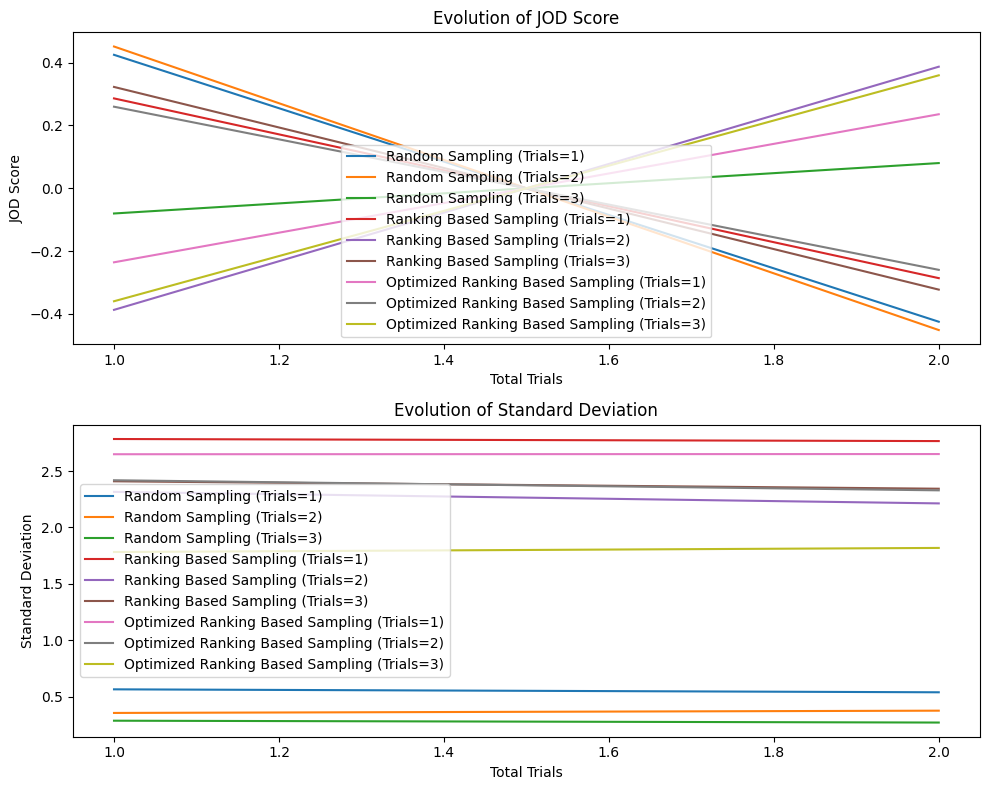

In [73]:
def execute_experiment(number_of_trials, method_for_sampling):
    total_images = 20
    scale_of_jod = 10
    true_scores = ground_truth(scale_of_jod, total_images)

    evolution_avg_jod, evolution_avg_std = monteCarloPwcSim(
        true_scores, number_of_trials, pwcObserverSimulator, method_for_sampling
    )

    return evolution_avg_jod, evolution_avg_std

def visualize_results(axis, data_sequence, label_metric, method_label, trial_count):
    axis.plot(range(1, len(data_sequence) + 1), data_sequence, label=f"{method_label} (Trials={trial_count})")
    axis.set_xlabel("Total Trials")
    axis.set_ylabel(label_metric)
    axis.legend()
    axis.set_title(f"Evolution of {label_metric}")

trial_counts = [1, 2, 3]

methods_for_sampling = {
    "Random Sampling": randomSampling,
    "Ranking Based Sampling": rankingBasedSampling,
    "Optimized Ranking Based Sampling": optRankingBasedSampling,
}

figure, plot_axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

for method_name, sampling_method in methods_for_sampling.items():
    for trial_number in trial_counts:
        avgJodEvolution, avgStdEvolution = execute_experiment(trial_number, sampling_method)
        visualize_results(plot_axes[0], avgJodEvolution, "JOD Score", method_name, trial_number)
        visualize_results(plot_axes[1], avgStdEvolution, "Standard Deviation", method_name, trial_number)

plt.tight_layout()
plt.show()


#### <b>A16:</b>

#### <b>Q17: Let's now fix the number of standard trials (a.k.a the number of comparisons) to 1.5, and vary the JOD range of the scene. Plot again the SROCC, PLC and STD according to a varing JOD (2-20), for your 4 sampling algorithms. How do you interpret the results? Regarding the std, which sampling algorithm is better? why do you think this is the case?</b>

In [80]:
def monteCarloPwcSim(groundTruthScores, nbTrials, observerSimulator, samplingAlgorithm, **kwargs):
    """
    1 - Our simulator takes the list of groundtruth image scores, the number of standard trials, and the simulations functions
    2 - For each iteration, we compute the image scores
    3 - Then, we select the next batch of pairs where each batch consists for n-1 pairs, where n is the number of images. In this case, 1 st = n/2 * nb batches.
    4 - We simulate the comparisons and update the comparison matrix
    5 - Returns the average image scores per batch.
    """
    nbImages = len(groundTruthScores)
    nbSimulations = kwargs.get('nbSimulations', 1)
    nbBatches = int(nbImages*1.5 // 2)
    compMat = np.zeros((nbImages, nbImages), dtype=int)
    compBatch = []

    normalizedGroundTruthScores = adaComp.normalizeScale(groundTruthScores, shiftToRefImage=True)

    # Simulate comparisons
    for _ in range(nbTrials):
        # Generate a batch of pairs
        compBatch = samplingAlgorithm(nbImages=nbImages, imageScores=normalizedGroundTruthScores)

        for pair in compBatch:
            pairScores = [groundTruthScores[pair[0]], groundTruthScores[pair[1]]]
            orderedPairIdx, _ = observerSimulator(pairScores)
            orderedPair = [pair[orderedPairIdx[0]], pair[orderedPairIdx[1]]]

            compMat = adaComp.updateCompMat(orderedPair, compMat)

    jodScores, jodStds = adaComp.JODScores(compMat)

    avgJodScoreEvolution = [sum(jodScores[i:i+nbBatches]) / nbBatches for i in range(0, len(jodScores), nbBatches)]
    avgStdScoreEvolution = [sum(jodStds[i:i+nbBatches]) / nbBatches for i in range(0, len(jodStds), nbBatches)]

    return avgJodScoreEvolution, avgStdScoreEvolution

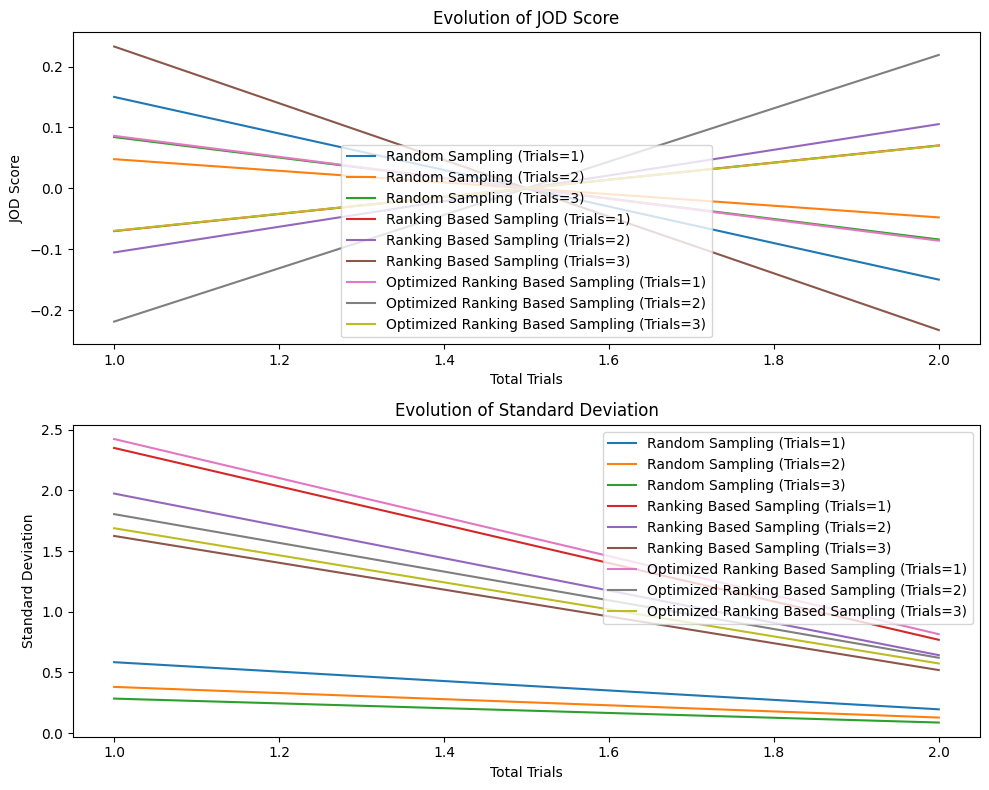

In [81]:
def execute_experiment(number_of_trials, method_for_sampling):
    total_images = 20
    scale_of_jod = 10
    true_scores = ground_truth(scale_of_jod, total_images)

    evolution_avg_jod, evolution_avg_std = monteCarloPwcSim(
        true_scores, number_of_trials, pwcObserverSimulator, method_for_sampling
    )

    return evolution_avg_jod, evolution_avg_std

def visualize_results(axis, data_sequence, label_metric, method_label, trial_count):
    axis.plot(range(1, len(data_sequence) + 1), data_sequence, label=f"{method_label} (Trials={trial_count})")
    axis.set_xlabel("Total Trials")
    axis.set_ylabel(label_metric)
    axis.legend()
    axis.set_title(f"Evolution of {label_metric}")

trial_counts = [1, 2, 3]

methods_for_sampling = {
    "Random Sampling": randomSampling,
    "Ranking Based Sampling": rankingBasedSampling,
    "Optimized Ranking Based Sampling": optRankingBasedSampling,
}

figure, plot_axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

for method_name, sampling_method in methods_for_sampling.items():
    for trial_number in trial_counts:
        avgJodEvolution, avgStdEvolution = execute_experiment(trial_number, sampling_method)
        visualize_results(plot_axes[0], avgJodEvolution, "JOD Score", method_name, trial_number)
        visualize_results(plot_axes[1], avgStdEvolution, "Standard Deviation", method_name, trial_number)

plt.tight_layout()
plt.show()


Regarding the std, the best sampling algorithm looks like the Random Sampling. What we observe is that when the st is 1.5 the std will diminishes as far as we go through the experiments.

It is logical as we observed that JOD score converges when ntrial = 1.5

### <b>Q18: What are the conclusions you can make from this experiment? What approach performs better and in what situtations?</b>

#### <b>A18:</b>
- Unfortunately I did not suceed in making the script fully run (with SROCC and PLC and with ASAP), there was a dimensional error. However we can still conclude that random sampling performs really well and the number of st has a big influence in it as std drops when st = 1.5.

----
## <b>D - Bootstrapping

> Since we do not have the ground truth scores in real life, we rely on a different approach to estimate the precision of the PWC experiments.

### <b>Q19: In your opinion, what are possible steps to evaluate the results of a PWC experiment?




#### <b>A19:</b>

- cross validation
- bootstrap
- statistical analysis



### <b>Q20: One essential step to evaluate the PWC experiment is by estimating the confidence in our JOD scores. To do so, we compute the confidence intervals using percentile bootstrapping. Bootstrapping can be used to estimate the empirical distribution of our samples, and therefore its variability. In a PWC experiment, both the pairs and the individual comparison matrices (per person) can be considered candidate samples. Bootstrapping over the comparison samples usually results in smaller confidence intervals than over observer matrices.
### <b>Explain how the following functions work

In [ ]:
def bootstrapMatrix(compMat, softSampling=False):
    """
    Soft sampling: instead of repeating the whole comparison pair, we sample per image, thus pair row
    """
    rows,cols = compMat.shape

    if softSampling:
        pairList = []
        for r in range(rows):
            rowPairList = np.where(compMat[r,:]!=0)[0]
            nbComparisons = int(np.sum(compMat[r,:]))
            rowPairList = [(r, pair1) for pair1 in rowPairList for i in range(int(compMat[r, pair1]))]

            pairList += [rowPairList[i] for i in np.random.choice(len(rowPairList), nbComparisons, replace=True)]
    else:
        pairList = np.where(compMat!=0)

        nbComparisons = int(np.sum(compMat))
        # We suppose that EACH comparison is one sample, hence for a pair with many comparisons, this is considered as many samples, from which comes the repetition of the same tuple.
        pairList = [(pair0, pair1) for pair0, pair1 in zip(pairList[0], pairList[1]) for i in range(int(compMat[pair0, pair1]))]
        pairList = [pairList[i] for i in np.random.choice(len(pairList), nbComparisons, replace=True)]

    compMat = np.zeros((rows, cols),)
    for pair in pairList:
        compMat[pair] += 1
    return compMat

def bootstrapObserverList(listObserverMatrices, ):
    nbObservers = len(listObserverMatrices)

    loadedObserverMatrices = []

    for file in listObserverMatrices:
        compMatData = np.load(file)
        compMat = compMatData['COMP_MAT']
        compMatData.close()
        loadedObserverMatrices.append(compMat)

    boostrappedMatrices = [loadedObserverMatrices[i] for i in np.random.choice(nbObservers, nbObservers, replace=True)]

    return np.sum(boostrappedMatrices, axis=0)

def confidenceInterval(variablesScoreList, confidenceLevel=0.95,):
    rows,cols = variablesScoreList.shape
    confidenceIntervals = np.zeros((rows,2))

    for i in range(rows):
        sortedScores = np.sort(variablesScoreList[i,:])
        confidenceIntervals[i,:] =  (sortedScores[int(np.floor((cols-1)*(1-confidenceLevel)/2))], sortedScores[int(np.ceil((cols-1)*(1+confidenceLevel)/2))])
    return confidenceIntervals

- This script is designed in order to evaluate the PWC experiment. Therefore, the three different steps are there in order to compute the confidence interval.

- First, the function generates a bootstrap sample of a comparison matrix from a PWC experiment. Then, the function performs bootstrap sampling over a list of observer matrices. And finally it calculates the confidence intervals for a list of variable scores.

----
----
# <b>Part 3 (Optional)- Perceptual Scale generation from real annotation matrices

In this section, we will work on the real output of an annotation campaign. A group of 21 people annotated a set of images following a Pairwise methodology. The pairs were proposed by an active sampling algorithm.  We will extract the IQ score (JOD), the confidence interval for each image and, finally, identify the random annotator.

In the data folder, each file .npz corresponds to an unique annotator. The rows and columns of the matrix correspond to image files, the order can be found on the "LIST_FILES" field of the npz.  

In file create_global_comparison_matrix.py, you can find a function that allows you to compute the global comparison matrix, that is, the matrix that summarizes all information from all annotators.

### <b>Q21 : Compute the global matrix and visualize it (check create_global_comparison_matrix.py). Do all images have the same number of comparisons? How many standard trials do we have?

#### <b>A21:</b>

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
import create_global_comparison_matrix


### <b> Q22: What image was compared the must number of times?</b>

#### <b>A22:</b>

### <b>Q23: Extract the JOD scores for every image and plot them ordered by value

#### <b>A23

#### <b>Q24: Using the functions introduced in the end of the previous section, generate the 95% confidence interval over 200 iterations of bootstrapping, by bootstrapping over comparisons and over observers.

### <b>Q25: What are your conclusions?

#### <b> A25: </b>